In [1]:
import pandas as pd
import os
def data_dictionary():
    path_train="dataset/"
    list_train=os.listdir(path_train)
    train_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j   
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)     
        k+=1
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [2]:
data=data_dictionary()

In [3]:
import cv2
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog

In [4]:

from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2023-07-25 11:03:02.399645: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-25 11:03:06.377133: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-07-25 11:03:06.378192: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PA

In [5]:
import numpy as np 
images=[]

for i in data['image_path']:
    img = load_img(i, target_size=(100, 100))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images.append(x)
    
    

In [6]:
dataset=np.array(images)

In [7]:
lable=data['target']

In [8]:
dataset.shape

(23184, 1, 100, 100, 3)

In [9]:
lable=np.array(lable)

In [10]:
import tensorflow as tf
EFFModel=tf.keras.applications.VGG19( weights = 'imagenet',  include_top = False, input_shape = (100,100 ,3))

2023-07-25 11:12:11.127334: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-07-25 11:12:11.127411: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-25 11:12:11.127451: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tensorflow-2-11-20230720-122152): /proc/driver/nvidia/version does not exist
2023-07-25 11:12:11.129047: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  A

In [11]:
del images
del data


In [12]:
dataset = np.reshape(dataset, (23184, 100, 100, 3))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [14]:
model=Sequential([ 
                   
                    Dense(200,activation='relu'),
                  Dense(100,activation='relu'),
                  Dense(23,activation='softmax'),

])

In [15]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [16]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 

In [17]:
import keras
acc=[]
num_classes = 23
lable = keras.utils.to_categorical(lable, num_classes)

In [20]:
features_train.shape

(20865, 3, 3, 512)

In [21]:
x_test=features_test.reshape(num_test,-1)
x_train=features_train.reshape(num_train,-1)

In [23]:
for i in range(5):
    
    history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),batch_size=16,verbose=1) 
    

Epoch 1/20
1305/1305 [==============================] - 7s 5ms/step - loss: 0.1915 - accuracy: 0.9430 - val_loss: 0.7319 - val_accuracy: 0.8607
Epoch 2/20
1305/1305 [==============================] - 7s 5ms/step - loss: 0.2154 - accuracy: 0.9369 - val_loss: 0.5395 - val_accuracy: 0.8969
Epoch 3/20
1305/1305 [==============================] - 7s 5ms/step - loss: 0.1881 - accuracy: 0.9478 - val_loss: 0.5670 - val_accuracy: 0.8767
Epoch 4/20
1305/1305 [==============================] - 7s 5ms/step - loss: 0.1950 - accuracy: 0.9459 - val_loss: 0.5790 - val_accuracy: 0.8853
Epoch 5/20
1305/1305 [==============================] - 7s 5ms/step - loss: 0.1800 - accuracy: 0.9503 - val_loss: 0.6156 - val_accuracy: 0.8831
Epoch 6/20
1305/1305 [==============================] - 7s 5ms/step - loss: 0.1905 - accuracy: 0.9509 - val_loss: 0.6998 - val_accuracy: 0.8767
Epoch 7/20
1305/1305 [==============================] - 7s 5ms/step - loss: 0.1697 - accuracy: 0.9586 - val_loss: 0.5306 - val_accuracy:

In [24]:
eval=model.evaluate(x_test,y_test)

73/73 [==============================] - 0s 2ms/step - loss: 2.9444 - accuracy: 0.9237


In [25]:
eval

[2.944441795349121, 0.9236739873886108]

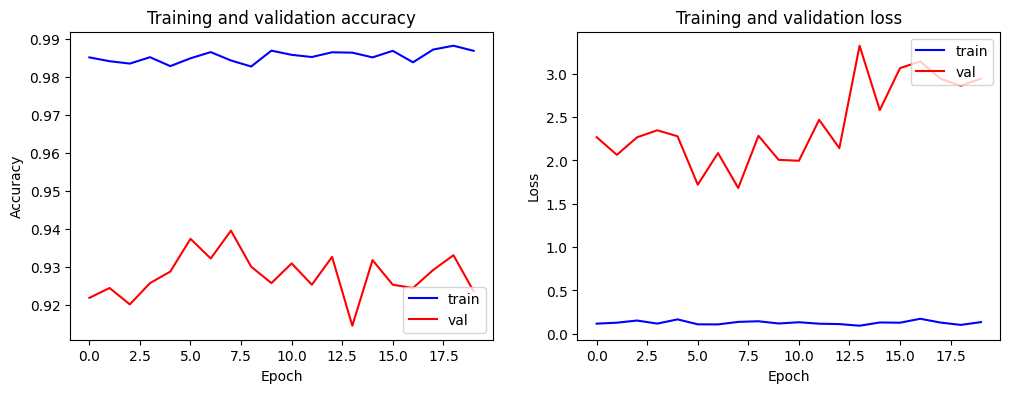

In [34]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))

# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [35]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_pred

73/73 [==============================] - 0s 2ms/step


array([17,  5, 18, ...,  3,  0,  6])

In [36]:
y_test=np.argmax(y_test, axis=1)

In [37]:
from sklearn.metrics import *
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       101
           1       0.96      0.96      0.96        76
           2       0.96      0.94      0.95       118
           3       0.80      0.84      0.82        81
           4       0.83      0.93      0.88        87
           5       0.96      0.91      0.93       100
           6       0.89      0.97      0.93        95
           7       0.94      0.92      0.93       110
           8       0.98      0.88      0.92        90
           9       0.98      0.92      0.95        99
          10       0.89      0.80      0.84       107
          11       0.89      0.94      0.92        88
          12       0.85      0.91      0.88       125
          13       0.96      0.93      0.94       117
          14       0.84      0.93      0.88       101
          15       0.93      0.92      0.92       100
          16       0.97      0.93      0.95        98
          17       0.99    